## HOMEWORK 2
### Gabriel Lara 00215784


## Exercise 1:

1. Suppose a password is chosen as a concatenation of seven lower-case dictionary words. Each word is selected uniformly at random from a dictionary of size 50,000. An example of such a password is "mothercathousefivenextcrossroom". How many bits of entropy does this have?


In [7]:
import math

# Dicctionary size
dict_size = 50000

# Sevel low case concatenation words
password_length = 7

# possible passwords
total_passwords = dict_size ** password_length

# Bits of entropy
entropy = math.log2(total_passwords)

print(f"The entropy is: {entropy} bits.")


The entropy is: 109.26748332105768 bits.


In [8]:
## 2. Consider an alternative scheme where a password is chosen as a sequence of 10 random alphanumeric characters 
## (including both lower-case and upper-case letters). An example is "dA3mG67Rrs". How many bits of entropy does this have?

import math

# Dicctionary size
char_set_size = 26 + 26 + 10

# Passoword length concatenation words
password_length = 10

# possible passwords
total_passwords = char_set_size ** password_length

# Bits of entropy
entropy = math.log2(total_passwords)

print(f"The entropy is: {entropy} bits.")


The entropy is: 59.54196310386875 bits.


## 3. Which password is better, the one from 1. or 2.?

According to the results, we determined that literal 1. is a better option for passwords since it has a larger entropy value, so the password it would be less predictable

## Exercise 2:

#### 1. Design a data verification system using hash functions. Explain the steps involved in the process.


###### 1. Choosing a Hash Function:
Select a cryptographic hash function like SHA-256. This function takes an input (referred to as a 'message') 
and produces a fixed-size string of bytes. 
The resulting output, known as a 'digest', is unique for each distinct input.

###### 2. Hashing the Original Data:
Apply the chosen hash function to the data you want to authenticate. 
This process generates a hash value or digest.

###### 3. Securely Storing the Hash Value:
Safely store the hash value for later use in verification.

###### 4. Rehashing and Verification Comparison:
When you wish to confirm the integrity of the data, reapply the same hash function to it. 
This will yield a new hash value. Compare this new value with the one stored previously. 
If they align, it signifies that the data remains unaltered. 
A mismatch indicates that the data has been changed since it was originally hashed.

###### 5. Dealing with Modifications:
In the event of data alteration, your system should have a protocol in place to address this. 
For instance, it might choose to reject the data, notify an administrator, 
or execute another predetermined action.





### 2. Discuss the advantages and disadvantages of using hash functions for data verification.

#### Advantages:

- Data Integrity: Hash functions can verify data integrity. If data is altered in any way, the hash value will change, indicating that the data is not the same as the original.

- Efficiency: Hash functions are computationally efficient. They can process large amounts of data quickly and produce a fixed-size hash value.

- Duplicate Prevention: Hash functions can be used to detect duplicates. If two sets of data have the same hash value, it is likely that the data is identical.

- Anonymity: Since hash functions are one-way and computationally difficult to retrieve the original data from the hash value, they can be used to maintain data anonymity.

#### Disadvantages:

- Collisions: Although rare, two different sets of data can produce the same hash value, known as a collision. This can be a problem in certain cases, such as in cryptographic security.

- Irreversibility: Once data has been converted to a hash value, it cannot be reverted to its original form. This can be a disadvantage if you need to retrieve the original data.

- Lack of Uniqueness: Although collisions are rare, there is no guarantee that hash values are unique for each unique set of data. This can be problematic in applications like databases, where uniqueness may be important.



### 3. Provide an example of a real-world application where a data verification system using hash functions is used.

For Example in Password Registration:

When a user creates an account or sets a password, the system takes the entered password and applies a hash function to generate a hash value.

- Storing Hashed Password:

The system stores only the hash value of the password in its database, not the actual plaintext password.

- Authentication:

When a user attempts to log in, they provide their password. The system then applies the same hash function to the provided password, generating a hash value.

- Comparing Hash Values:

 The system compares the generated hash value with the stored hash value in its database.

- Granting Access:

If the two hash values match, the user is granted access. This means that the entered password is correct.
No Storage of Actual Passwords:

 Since the system only stores the hash values, even if the database is compromised, the attacker would not have access to the actual passwords.



## Exercise 3:

### 1. Define what a Message Authentication Code (MAC) is and how it is used in cryptography.

A Message Authentication Code (MAC) is a cryptographic technique ensuring both the authenticity of a message and the identity of its sender. Achieved through a short piece of information generated with a secret key, the MAC is sent alongside the original data. Upon receipt, the receiver calculates a MAC using the same key and compares it to the received MAC. A match verifies both the message's integrity and the sender's authenticity. MACs are integral in security protocols like IPsec, SSL/TLS, SSH, and safeguarding credit card transactions from tampering during transmission.



### 2. Explain the process of generating and verifying a MAC.


The process of generating and verifying a Message Authentication Code (MAC) involves first agreeing on a secret key between the sender and the receiver. Then, the sender creates the MAC using this key and the message data through a cryptographic hash function. Subsequently, the sender sends both the original data and the MAC to the receiver. On the other hand, upon receiving these elements, the receiver generates their own MAC using the same secret key and the received data. Finally, the MAC generated by the receiver is compared with the one received. If they match, it is concluded that the data has not been altered during transmission and originates from the expected sender.



### 3. Discuss the importance of using MACs in secure communication systems.

- Authentication of Data Origin:
A MAC allows the recipient of a message to confirm that the message comes from the expected sender. This is because the MAC is generated using a secret key known only to the sender and the recipient.

- Data Integrity:
A MAC also enables the recipient to verify that the message has not been altered during transmission. Any change in the message will result in a different MAC. Therefore, if the received MAC matches the calculated MAC, the recipient can be assured that the message has not been tampered with.

- Prevention of Replay Attacks:
By including unique information in each message (such as a sequence number or a timestamp) before calculating the MAC, a replay attack can be prevented. In a replay attack, an attacker intercepts a message and then retransmits it, hoping to deceive the recipient into believing it is a legitimate communication from the sender.

- Efficiency:
MACs provide an efficient way to authenticate messages. They are shorter and require fewer computational resources to generate and verify compared to other forms of authentication, such as digital signatures.

## Exercise 4:

Given the values of p = 17 and q = 23, generate a pair of keys for RSA.


In [11]:
import sympy

# Given values
p = 17
q = 23

# Compute n = p * q
n = p * q

# Compute Euler's totient function phi(n) = (p-1) * (q-1)
phi_n = (p - 1) * (q - 1)

# Choose an integer e such that 1 < e < phi(n) and e is coprime with phi(n)
for e in range(2, phi_n):
    if sympy.gcd(e, phi_n) == 1:
        break

# We use the sympy function to get the multiplicative inverse to find a d value such that (d * e) % phi(n) = 1
d = sympy.mod_inverse(e, phi_n)

print(f"Public key: ({e}, {n})")
print(f"Private key: ({d}, {n})")


Public key: (3, 391)
Private key: (235, 391)



## Exercise 5:

### 1. Design a public key infrastructure (PKI) system. Explain the components and their roles in the system.


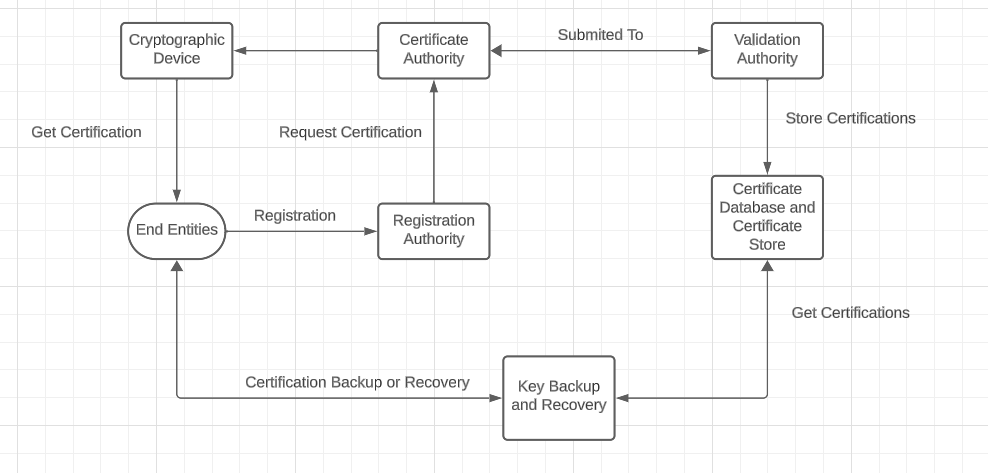

- **End Entities:**

  - End entities, which can be individuals, hardware devices (like servers or routers), or software systems (such as web applications), utilize the PKI system to secure their communications and transactions.

- **Certificate Authority (CA):**

  - The CA serves as the central element of a PKI system. It's a trusted third party responsible for issuing digital certificates to end entities. These certificates validate the ownership of a public key by the specified certificate subject.

- **Registration Authority (RA):**

  - The RA verifies the identity of end entities prior to CA-issued digital certificate issuance. It functions as an authenticator for the CA.

- **Validation Authority (VA):**

  - The VA supplies certificate status details to end entities, including checks for revocation or validity.

- **Certificate Database and Certificate Store:**

  - These components store issued certificates as well as pending or declined certificate requests.

- **Key Backup and Recovery:**

  - This system enables end entities to create backups of their cryptographic keys for potential recovery in case of loss.

- **Cryptographic Device:**

  - A secure device like a smart card or hardware security module (HSM) to generate cryptographic keys.


### 2. Discuss the advantages and challenges of implementing a PKI system.

- **Advantages:**
  - **Security:** PKI is one of the most effective methods for implementing public key cryptography, a cornerstone of modern data security. It ensures strong authentication and maintains data integrity and confidentiality.

  - **Non-Repudiation:** With PKI, the message sender cannot deny sending it, providing non-repudiation for the transaction.

  - **Scalability:** PKI can accommodate a large number of users and is easily scalable to meet increasing demands.

  - **Interoperability:** PKI standards are widely accepted, enabling seamless collaboration between different systems and networks.

- **Challenges:**
  - **Complexity:** Setting up a PKI system can be intricate and demands expertise in cryptography and security.

  - **Key Management:** The secure storage, distribution, and revocation of keys are crucial for PKI system security. Poor key management can lead to security breaches.

  - **Cost:** Implementing and maintaining a PKI system can be costly, especially for large organizations.

  - **Revocation:** Managing certificate revocation can be demanding. It's essential to ensure that once a certificate is revoked, it is no longer trusted by any part of the system.




### 3. Provide an example of a real-world application where a PKI system is used.


- **Real-world Application: Secure Internet Communication**

  One practical application of a Public Key Infrastructure (PKI) system is in Secure Sockets Layer (SSL) and Transport Layer Security (TLS) protocols, which are employed to secure internet communications.

  When you access a website with an "https" prefix, your browser utilizes SSL/TLS to communicate with the website's server. The server possesses a digital certificate issued by a Certificate Authority (CA), an integral part of a PKI system. This certificate contains the server's public key and additional details like the owning organization's name and the CA's name.

  Your browser employs this certificate to verify that it is indeed communicating with the correct server, preventing imposters. It then establishes an encrypted connection with the server, ensuring any data exchanged with the website remains secure and inaccessible to third-party interception or tampering.

  This scenario exemplifies how PKI systems find practical application in real-world scenarios. They are also instrumental in securing email communications, authenticating users for VPN access, and various other contexts.



## Exercise 6:

Design a system for digital signatures based on public-key cryptography. Explain the steps involved in the process and the role of each component.

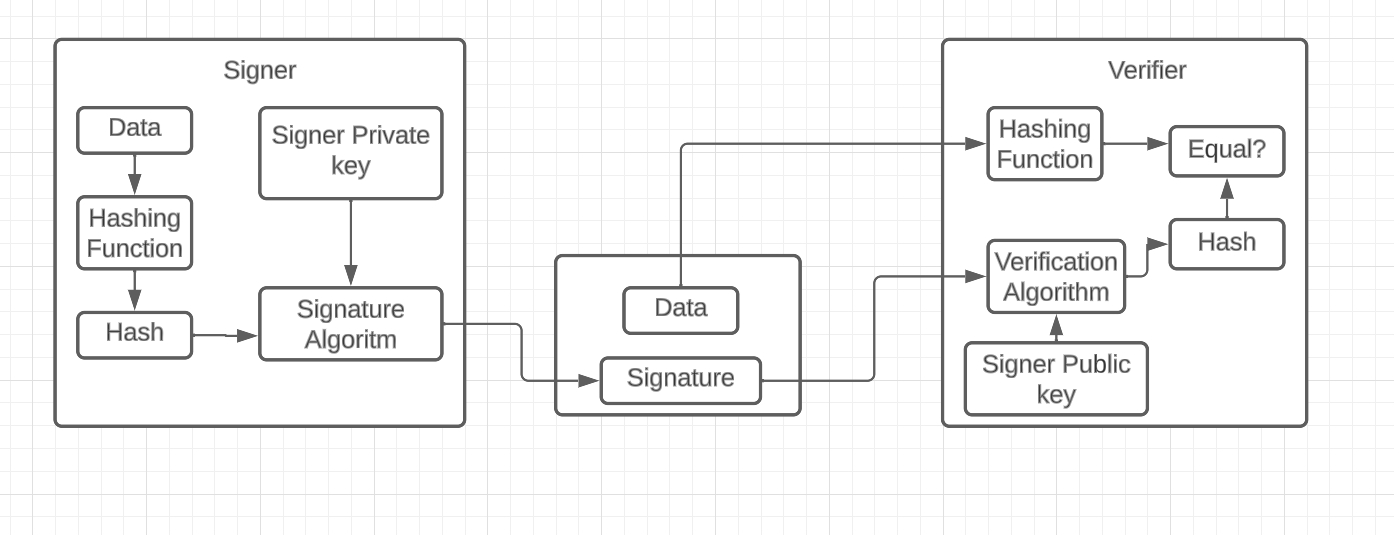

- Each individual adopting this approach possesses a pair of keys - one public and one private.

- Generally, separate sets of key pairs are used for encryption/decryption and signing/verifying. The private key utilized for signing is termed the signature key, while the public key is referred to as the verification key.

- The process begins with the signer inputting data into a hash function, generating a corresponding hash.

- Subsequently, the hash value and signature key are processed by the signature algorithm, producing the digital signature for the given hash. This signature is then appended to the data and transmitted to the verifier.

- The verifier, in turn, employs both the digital signature and the verification key in the verification algorithm, resulting in an output value.

- Simultaneously, the verifier applies the same hash function to the received data, yielding a hash value.

- To authenticate, the hash value and the output of the verification algorithm are compared. The verifier determines the validity of the digital signature based on this comparison.

- Since the digital signature is generated using the signer's exclusive 'private' key, it becomes impossible for anyone else to possess this key. This ensures that the signer cannot later disavow having signed the data.


  1. **Key Pair Generation**: Initially, a pair of keys is created - a private key, kept confidential, and a widely distributed public key. These keys are interconnected in such a way that what one encrypts, only the other can decrypt.

  2. **Message Signing**: To send a signed message, the user first generates a hash of the message. This hash is then encrypted with the user's private key, producing the digital signature. Both the original message and its digital signature are sent to the recipient.

  3. **Signature Verification**: Upon receipt, the recipient decrypts the signature using the sender's public key to retrieve the hash. Simultaneously, the recipient generates a hash of the received message. If the two hashes align, it confirms that the message remains unaltered and was indeed sent by the purported sender.

- **Key Components**:

  - **Private Key**: Kept confidential, this key is used to encrypt message hashes, effectively 'signing' the message.

  - **Public Key**: Widespread distribution allows others to decrypt received digital signatures.

  - **Hash Function**: Creates a unique hash of the message. Any alterations in the message result in a distinct hash, enabling the recipient to verify if tampering has occurred.

  - **Encryption & Decryption Algorithms**: These algorithms handle the encryption of the message hash with the sender's private key and its decryption with the public key.
